In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers

import os
import gc
from timeit import default_timer as timer

In [2]:
train_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/train'
val_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/validation'
test_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/test'

In [3]:
train_img = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(train_dir,
                                                                  target_size = (256,256), 
                                                                  color_mode='grayscale',
                                                                  class_mode='binary')
val_img = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(val_dir,
                                                                target_size = (256,256), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')
test_img = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(test_dir,
                                                                target_size = (256,256), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')

Found 383 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [7]:
# plot performance
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch

    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

## Baseline CNN: 2 Conv2D, 1 Dense

In [5]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy', 'Recall', 'Precision'])

In [7]:
# training
start = timer()
history_baseline = model.fit(train_img, 
                    epochs=20, 
                    validation_data=val_img, 
                    workers = 7)
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
12/12 [==============================] - 14s 1s/step - loss: 11.8517 - accuracy: 0.6632 - recall: 0.4348 - precision: 0.5405 - val_loss: 0.3763 - val_accuracy: 0.8193 - val_recall: 0.5333 - val_precision: 0.9412
Epoch 2/20
12/12 [==============================] - 14s 1s/step - loss: 0.3403 - accuracy: 0.8538 - recall: 0.6957 - precision: 0.8727 - val_loss: 0.7229 - val_accuracy: 0.5904 - val_recall: 0.9667 - val_precision: 0.4677
Epoch 3/20
12/12 [==============================] - 15s 1s/step - loss: 0.3330 - accuracy: 0.8616 - recall: 0.7899 - precision: 0.8195 - val_loss: 0.5430 - val_accuracy: 0.6627 - val_recall: 0.9667 - val_precision: 0.5179
Epoch 4/20
12/12 [==============================] - 15s 1s/step - loss: 0.1784 - accuracy: 0.9399 - recall: 0.9348 - precision: 0.9021 - val_loss: 0.3760 - val_accuracy: 0.8072 - val_recall: 0.5667 - val_precision: 0.8500
Epoch 5/20
12/12 [==============================] - 15s 1s/step - loss: 0.1011 - accuracy: 0.9634 - recall: 0.9

In [9]:
scores = model.evaluate(test_img, verbose=1)

3/3 [==============================] - 0s 139ms/step - loss: 0.7861 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7500


Not bad for a first model with some default hyperparameters. Twenty epochs with this small of a dataset led to overfitting fairly quickly. 

Result: Val_Acc -- 79.5, Val_Loss -- 0.853

Next steps: augment data to generate more data to combat overfitting.

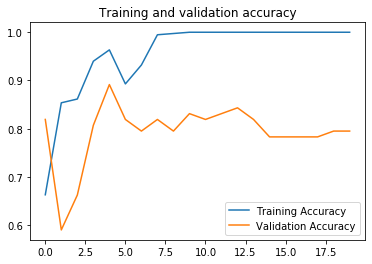

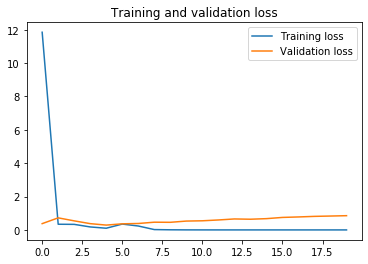

In [15]:
plot_performance(history_baseline)

## CNN: 3 Conv2D, 2 Dense

In [4]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(64, 3, activation = 'relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [9]:
# training
start = timer()
history_2 = model.fit(train_img, 
                    epochs=10, 
                    validation_data=val_img, 
                    workers = 7)
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/10
12/12 [==============================] - 16s 1s/step - loss: 1.9259 - accuracy: 0.8903 - val_loss: 0.3388 - val_accuracy: 0.8795
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 0.0584 - accuracy: 0.9791 - val_loss: 0.4254 - val_accuracy: 0.8675
Epoch 3/10
12/12 [==============================] - 17s 1s/step - loss: 0.0220 - accuracy: 0.9974 - val_loss: 0.4985 - val_accuracy: 0.8795
Epoch 4/10
12/12 [==============================] - 17s 1s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.6851 - val_accuracy: 0.8675
Epoch 5/10
12/12 [==============================] - 19s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.6922 - val_accuracy: 0.8795
Epoch 6/10
12/12 [==============================] - 20s 2s/step - loss: 3.0583e-04 - accuracy: 1.0000 - val_loss: 0.7452 - val_accuracy: 0.8795
Epoch 7/10
12/12 [==============================] - 18s 2s/step - loss: 1.1081e-04 - accuracy: 1.0000 - val_loss: 0.8164 - val_accuracy: 0.8554
Epoch 8/10
1

In [10]:
scores = model.evaluate(test_img, verbose=1)

3/3 [==============================] - 0s 156ms/step - loss: 1.7724 - accuracy: 0.7821


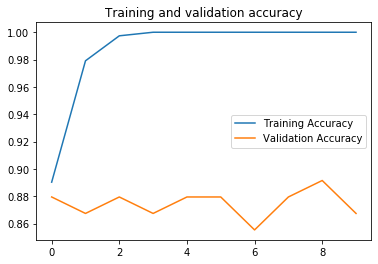

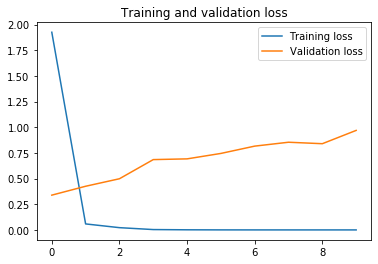

In [11]:
plot_performance(history_2)

## CNN: 3 Conv2D, 2 Dense with Padding

In [12]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(64, 3, padding ='same', activation = 'relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, padding ='same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, padding ='same', activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

In [14]:
# training
start = timer()
history_3 = model.fit(train_img, 
                    epochs=10, 
                    validation_data=val_img, 
                    workers = 7)
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/10
12/12 [==============================] - 23s 2s/step - loss: 2.3573 - accuracy: 0.6084 - val_loss: 0.5496 - val_accuracy: 0.6747
Epoch 2/10
12/12 [==============================] - 22s 2s/step - loss: 0.5282 - accuracy: 0.7389 - val_loss: 0.3983 - val_accuracy: 0.8554
Epoch 3/10
12/12 [==============================] - 23s 2s/step - loss: 0.4320 - accuracy: 0.8251 - val_loss: 0.2997 - val_accuracy: 0.9036
Epoch 4/10
12/12 [==============================] - 23s 2s/step - loss: 0.3026 - accuracy: 0.8721 - val_loss: 0.2716 - val_accuracy: 0.9157
Epoch 5/10
12/12 [==============================] - 26s 2s/step - loss: 0.2928 - accuracy: 0.8642 - val_loss: 0.3072 - val_accuracy: 0.8916
Epoch 6/10
12/12 [==============================] - 29s 2s/step - loss: 0.3927 - accuracy: 0.8486 - val_loss: 0.2881 - val_accuracy: 0.9157
Epoch 7/10
12/12 [==============================] - 27s 2s/step - loss: 0.2396 - accuracy: 0.9112 - val_loss: 0.5971 - val_accuracy: 0.7229
Epoch 8/10
12/12 [==

In [16]:
scores = model.evaluate(test_img, verbose=1)

3/3 [==============================] - 1s 248ms/step - loss: 0.8718 - accuracy: 0.7692


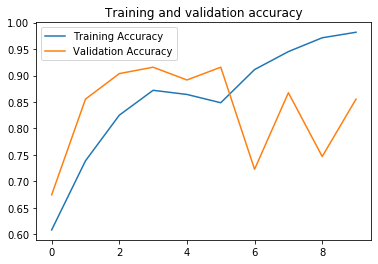

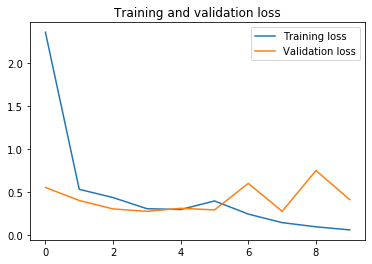

In [17]:
plot_performance(history_3)

In [19]:
hist_df = pd.DataFrame(history_3.history) 
hist_df

,loss,accuracy,val_loss,val_accuracy
0,2.357323,0.608355,0.549572,0.674699
1,0.528177,0.738903,0.398326,0.855422
2,0.432025,0.825065,0.299713,0.903614
3,0.302634,0.872063,0.271601,0.915663
4,0.292775,0.864230,0.307158,0.891566
5,0.392706,0.848564,0.288116,0.915663
6,0.239597,0.911227,0.597110,0.722892
7,0.140185,0.945170,0.272138,0.867470
8,0.091719,0.971279,0.746123,0.746988
9,0.055361,0.981723,0.407047,0.855422


Still a lot of overfitting to the train dataset.